In [3]:
%pylab inline
import pandas as pd
from sklearn.cluster import KMeans
matplotlib.rcParams.update({'font.size': 15})

Populating the interactive namespace from numpy and matplotlib


In [8]:
h_unbound_rmsd_to_u = pd.read_csv('rmsd/h_unbound_to_u.csv').values.ravel()
r2_unbound_rmsd_to_u = pd.read_csv('rmsd/r2_unbound_to_u.csv').values.ravel()

h_unbound_q = pd.read_csv('q/h_unbound_q.csv').values.ravel()
r2_unbound_q = pd.read_csv('q/r2_unbound_q.csv').values.ravel()

In [9]:
h_unbound_q.shape,h_unbound_rmsd_to_u.shape

((36012,), (36012,))

In [10]:
f_h = vstack((h_unbound_rmsd_to_u, h_unbound_q))
kmeans = KMeans(n_clusters=20).fit(f_h.T)
kmeans.labels_

array([3, 3, 3, ..., 7, 7, 7], dtype=int32)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


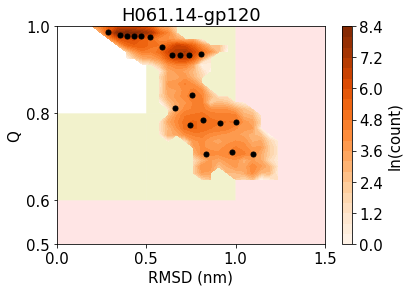

In [13]:
fill_between(arange(1, 4, 0.0001), 0, 0.6, facecolor='r', interpolate=True, alpha=0.1)
fill_between(arange(1, 4, 0.0001), 0.6, 1, facecolor='r', interpolate=True, alpha=0.1)
fill_between(arange(0, 1, 0.0001), 0, 0.6, facecolor='r', interpolate=True, alpha=0.1)
fill_between(arange(0.5, 1, 0.0001), 0.6, 0.8, facecolor='y', interpolate=True, alpha=0.2)
fill_between(arange(0, 0.5, 0.0001), 0.6, 0.8, facecolor='y', interpolate=True, alpha=0.2)
fill_between(arange(0.5, 1, 0.0001), 0.8, 1, facecolor='y', interpolate=True, alpha=0.2)

z,x,y = np.histogram2d(h_unbound_rmsd_to_u, h_unbound_q, bins=25)
extent = [x[0], x[-1], y[0], y[-1]]
contourf(np.log(z.T), 25, cmap=plt.cm.Oranges, extent=extent)
xlabel('RMSD (nm)')
xlim(0,1.5)
xticks([0.0,0.5,1,1.5])
ylabel('Q')
ylim(0.5,1)
yticks([0.5,0.6,0.8,1.0])
clb = colorbar()
clb.set_label('ln(count)')
title('H061.14-gp120')

cc_x = kmeans.cluster_centers_[:,0]
cc_y = kmeans.cluster_centers_[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
savefig('../imgs/fig 5/H.png',dpi=480)

In [14]:
np.in1d(np.where((h_unbound_rmsd_to_u>1.38) & (h_unbound_rmsd_to_u<1.39))[0], np.where((h_unbound_q>0.29) & (h_unbound_q<0.3))[0])

array([], dtype=bool)

In [15]:
f_h = vstack((r2_unbound_rmsd_to_u, r2_unbound_q))
kmeans = KMeans(n_clusters=20).fit(f_h.T)
kmeans.labels_

array([15, 15, 15, ..., 19,  4,  4], dtype=int32)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


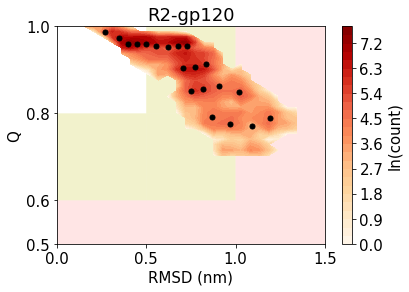

In [18]:
fill_between(arange(1, 4, 0.0001), 0, 0.6, facecolor='r', interpolate=True, alpha=0.1)
fill_between(arange(1, 4, 0.0001), 0.6, 1, facecolor='r', interpolate=True, alpha=0.1)
fill_between(arange(0, 1, 0.0001), 0, 0.6, facecolor='r', interpolate=True, alpha=0.1)
fill_between(arange(0.5, 1, 0.0001), 0.6, 0.8, facecolor='y', interpolate=True, alpha=0.2)
fill_between(arange(0, 0.5, 0.0001), 0.6, 0.8, facecolor='y', interpolate=True, alpha=0.2)
fill_between(arange(0.5, 1, 0.0001), 0.8, 1, facecolor='y', interpolate=True, alpha=0.2)

z,x,y = np.histogram2d(r2_unbound_rmsd_to_u, r2_unbound_q, bins=25)
extent = [x[0], x[-1], y[0], y[-1]]
contourf(np.log(z.T), 25, cmap=plt.cm.OrRd, extent=extent)
xlabel('RMSD (nm)')
xlim(0,1.5)
xticks([0.0,0.5,1,1.5])
ylabel('Q')
ylim(0.5,1)
yticks([00.5,0.6,0.8,1.0])
clb = colorbar()
clb.set_label('ln(count)')
title('R2-gp120')

cc_x = kmeans.cluster_centers_[:,0]
cc_y = kmeans.cluster_centers_[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
savefig('../imgs/fig 5/R2.png',dpi=480)